In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('heart_disease.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df= df.drop(['ChestPainType','ExerciseAngina'],axis=1)

In [6]:
df.isnull().sum()

,0
Age,0
Sex,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
Oldpeak,0
ST_Slope,0
HeartDisease,0


In [7]:
#היתרון בהשלמת ערכים היא שככל שיש יותר נתונים כך מבחן החיזוי יותר מדויק אך החיסרון הוא שהנתנוים המושלמים לא תמיד מדויקים .
#3 הגישות שאנו משתמשים בהם הן לפי ממוצע או לפי חציון או לפי שכיח
# היתרון בכל גישה הוא בהתאם למה שרוצים לחזות ,לדוגמא אם נרצה לחזות ממוצע של נקודות במשחק אז נשלים את הערכים החסרים על פי ממוצע של שחקן מסוים.


In [8]:
df = pd.get_dummies(df,columns=['RestingECG','ST_Slope'],drop_first=True,dtype=int)

In [9]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,M,140,289,0,172,0.0,0,1,0,0,1
1,49,F,160,180,0,156,1.0,1,1,0,1,0
2,37,M,130,283,0,98,0.0,0,0,1,0,1
3,48,F,138,214,0,108,1.5,1,1,0,1,0
4,54,M,150,195,0,122,0.0,0,1,0,0,1


In [10]:
df['Sex']= df['Sex'].map({'M':1,'F':0})

In [11]:
df.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.601307,0.193900,0.501089,0.430283
std,9.432617,0.407701,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.489896,0.395567,0.500271,0.495386
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
HeartDisease_column = df.pop('HeartDisease')
df['HeartDisease'] = HeartDisease_column

In [13]:
x= df.drop('HeartDisease',axis=1)
y= df['HeartDisease']

In [14]:
# prompt: test 20% and train 80%

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [15]:
# prompt: run normalizition

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [16]:
#הנתונים דורשים נרמול כיוון שלא כולם באותן פרופורציות.

In [17]:
#למודל knn ולמודל הרגרסיה חשובה פעולת הנרמול כיוון ששני המודלים האלו עובדים לפי המספרים ולכן חשוב שיהיו באותה פרופורציה ומודל עץ ההחלטה עובד על פי שאלות של כן או לא ולכן פחות קריטי הנרמול.

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        77
           1       0.83      0.80      0.82       107

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.80      0.79      0.79       184

[[60 17]
 [21 86]]


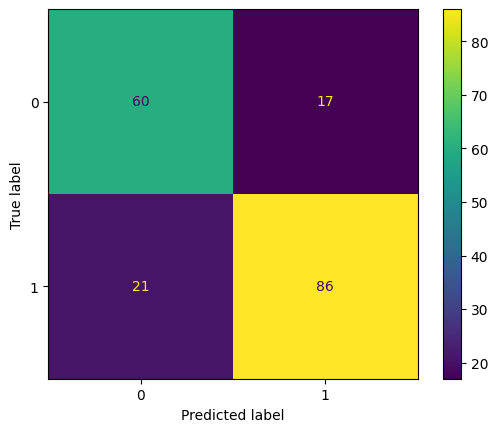

In [18]:
# prompt: run knn model on the train

# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(x_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()


   כיוון שגם תוצאות האימון שלו וגם תוצאות המבחן נמוכות ולכן הוא אינו מספיק טוב. underfitting מודל זה נמצא ב-

[0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1
 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        77
           1       0.83      0.80      0.82       107

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.80      0.79      0.79       184

[[60 17]
 [21 86]]


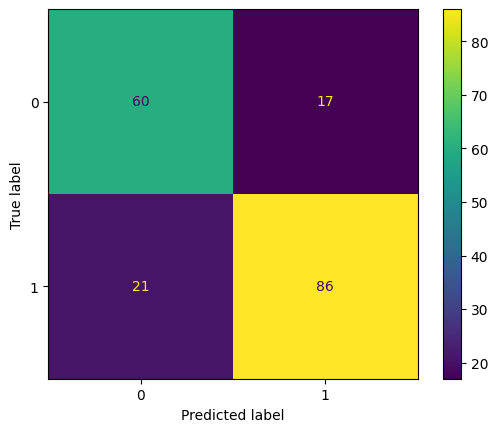

In [19]:
# prompt: run knn model on the test

#The code provided already trains and evaluates a KNN model.
#To run the model on the test data, the prediction is already done in the code:
#y_pred = knn_classifier.predict(x_test)

#If you want to see the predictions:
print(y_pred)

#The evaluation metrics (classification report, confusion matrix) are also already calculated and displayed.
#If you want to access these values individually:

from sklearn.metrics import classification_report, confusion_matrix

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Display confusion matrix with visualization
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


על פי הנתונים של מודל המבחן הדיוק בחיזוי היא 80 ואחוז ההסברה של המודל הוא 78 שזה סביר אך אפשר לשפר אותו.

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        77
           1       0.87      0.78      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184

[[65 12]
 [24 83]]


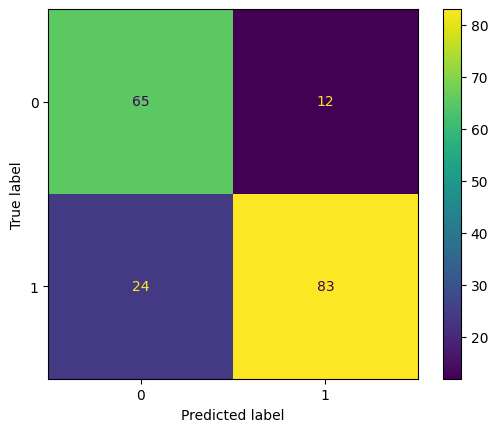

In [20]:
# prompt: run logistic regretion

from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_lr = logistic_regression_model.predict(x_test)

# Evaluate the model
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.show()


              precision    recall  f1-score   support

           0       0.74      0.82      0.78        77
           1       0.86      0.79      0.83       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184

[[63 14]
 [22 85]]


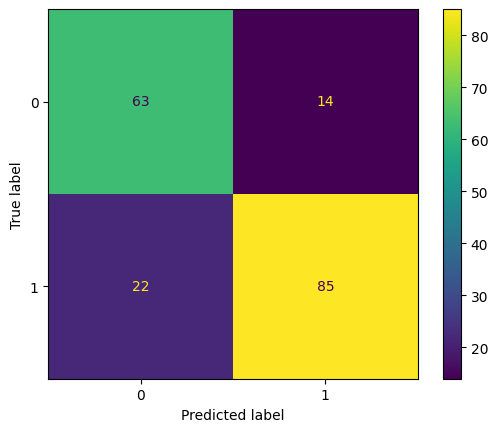

In [21]:
# prompt: run decission tree model

# Create and train the Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree_classifier.predict(x_test)

# Evaluate the model
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)
plt.show()


              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

[[68  9]
 [14 93]]


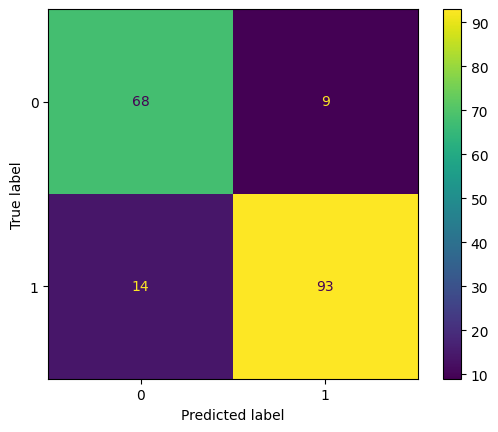

In [22]:
# prompt: run random forest model

from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42) # You can adjust hyperparameters
random_forest_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_classifier.predict(x_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.show()


**שאלה 15**
מודל knn -well fitted כיוון שהוא חוזה גם באימון וגם במבחן באחוזים טובים על פי recall ולא לומד דברים מיותרים .
מודל logistic regrettion- underfitting -כיוון שבאימון האחוזי חיזוי יותר גבוהים מבמבחן והם לא כל כך גבוהים .
מודל decision tree- well fitted כיוון שאחוזי החיזוי גם באימון וגם במבחן דומים ולא לומדים דברים מיותרים.
מודל random forest- wellfitted כיוון שאחוזי החיזוי שלו באימון מאוד גבוהים וגם במבחן והם תואמים כמעט ולכן יכולת החיזוי שלו טובה מאוד .


**שאלה 16**
מודל random forest הראה את התוצאה הטובה ביותר על פי הנתון recall שחוזה את אחוז הדיוק של המודל.


**שאלה 16ב
 המסקנה בתחום הנתנונים הוא שלכל חיזוי צריך לבחור את המודל המתאים ביותר בשבילו וכמובן זה תלוי גם בסוג החיזוי ,במקרה שלי החיזוי היה קטגוריאלי וניסיתי לחזות האם על פי כמה קריטריונים מסוימים נוכל לדעת אם לבן אדם יש מחלת לב או לא ,בעולם האמיתי יכול להיות לזה שימוש בכך שנוכל לנסות לחזות זאת בשלב מוקדם יותר ואולי אפילו למנוע זאת מאנשים.